### setup

In [1]:
import pandas as pd

### ingest data

In [2]:
data_00 = pd.read_parquet("../data/data_01.parquet", engine='pyarrow')
data_01 = pd.read_parquet("../data/data.parquet", engine='pyarrow')

data = combined = pd.concat([data_00, data_01], ignore_index=True)
data.head(3)

,id,topic,question_title,question_content,best_answer
0,700000,3,Are Monte verde golden toads extict or endange...,I have to do a report and model on an endanger...,"Since 1989, not a single Golden Toad has been ..."
1,700001,6,"looking for a book titled "" Medical Filing"" by...",,amazon.com \nhttp://www.amazon.com/gp/search/r...
2,700002,7,ShoulD i StoP?,Should i stop asking dumb questions? \n\nAm i ...,"why should you stop, it is your life do what y..."


In [3]:
data_00.shape

(700000, 5)

In [4]:
data_01.shape

(700000, 5)

In [5]:
data.shape

(1400000, 5)

has emojis

### eda

In [6]:
import re


emoji_pattern = re.compile("[\U00010000-\U0010FFFF]", flags=re.UNICODE)

data["has_emoji"] = data["question_content"].apply(lambda x: bool(emoji_pattern.search(x)))
data["has_emoji"].unique()

array([False,  True])

In [7]:
data["has_emoji"] = data["question_title"].apply(lambda x: bool(emoji_pattern.search(x)))
data["has_emoji"].unique()

array([False,  True])

In [8]:
data["has_emoji"] = data["best_answer"].apply(lambda x: bool(emoji_pattern.search(x)))
data["has_emoji"].unique()

array([False,  True])

In [9]:
data_copy = data.copy()

In [10]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   id                1400000 non-null  int32 
 1   topic             1400000 non-null  int64 
 2   question_title    1400000 non-null  object
 3   question_content  1400000 non-null  object
 4   best_answer       1400000 non-null  object
 5   has_emoji         1400000 non-null  bool  
dtypes: bool(1), int32(1), int64(1), object(3)
memory usage: 49.4+ MB


In [11]:
data_copy.duplicated().sum()

np.int64(0)

In [12]:
data_copy.isnull().sum()

id                  0
topic               0
question_title      0
question_content    0
best_answer         0
has_emoji           0
dtype: int64

In [13]:
print(f"{(data_copy.topic.value_counts() / len(data_copy.topic)) * 100}")

topic
3    10.0
6    10.0
7    10.0
8    10.0
9    10.0
1    10.0
0    10.0
2    10.0
5    10.0
4    10.0
Name: count, dtype: float64


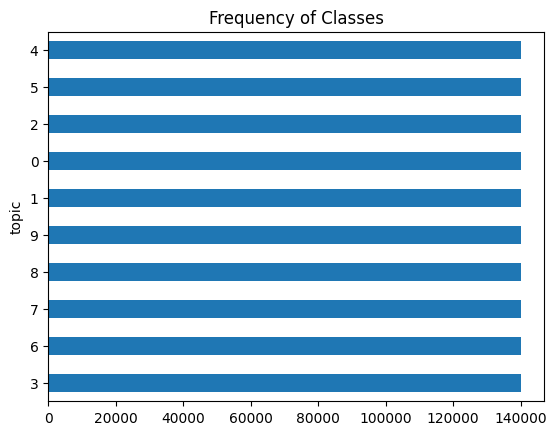

In [14]:
import matplotlib.pyplot as plt

data_copy["topic"].value_counts(ascending=True).plot.barh()

plt.title("Frequency of Classes")
plt.show()


In [15]:
data_combined = data_copy.copy()
data_combined.to_parquet("../data/data_combined.parquet", index=False)